In [55]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# utilize the sklearn.datasets package to load the Boston Housing dataset
boston = load_boston()
print(boston.data)

# Using pandas to display boston data with sense
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
print(boston_pd.head())
boston_pd.dtypes

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3    

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [56]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [57]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [58]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [59]:
boston['data'].shape # 506 filas y 13 columnas

(506, 13)

In [60]:
# scale the data to same value range first since PCA 
# is sensitive to the scaling of data
sc = StandardScaler()
X = sc.fit_transform(boston.data)
print(X)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [61]:
# create PCA with n_components=2 to allow visualization in 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca)

[[-2.09829748  0.77311239]
 [-1.45725167  0.59198527]
 [-2.07459756  0.59963941]
 ...
 [-0.31236047  1.15524638]
 [-0.27051907  1.04136153]
 [-0.12580322  0.76197803]]


In [62]:
# divide data into 5 clusters (refer to .ipynb for motivation)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

# create pandas dataframe of the housing data for Power BI
columns = np.append(boston.feature_names, ['MEDV', 'PC1', 'PC2', 'CLUSTER'])
data = np.concatenate((boston.data,
                       boston.target.reshape(-1, 1),
                       X_pca,
                       y_kmeans.reshape(-1, 1)),
                      axis=1)
df_housing = pd.DataFrame(data=data, columns=columns)
print(df_housing.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV       PC1       PC2  CLUSTER  
0     15.3  396.90   4.98  24.0 -2.098297  0.773112      0.0  
1     17.8  396.90   9.14  21.6 -1.457252  0.591985      0.0  
2     17.8  392.83   4.03  34.7 -2.074598  0.599639      0.0  
3     18.7  394.63   2.94  33.4 -2.611504 -0.006871      0.0  
4     18.7  396.90   5.33  36.2 -2.458185  0.097712      0.0  


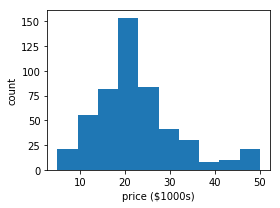

In [63]:
import matplotlib.pyplot as plt
plt.show()
plt.figure(figsize=(4, 3))
plt.hist(boston.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()


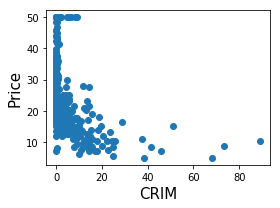

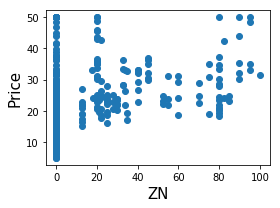

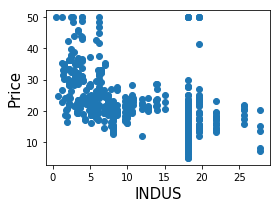

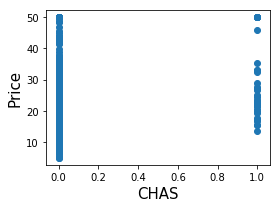

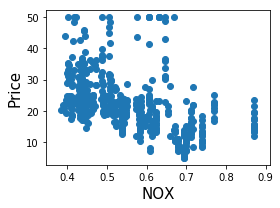

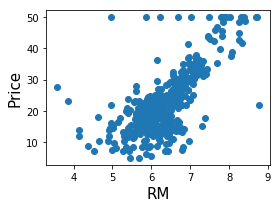

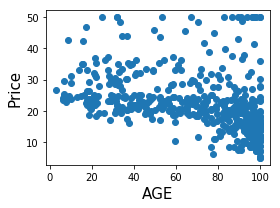

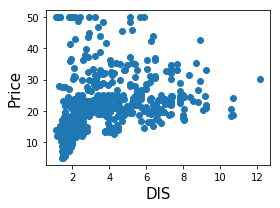

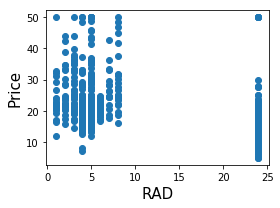

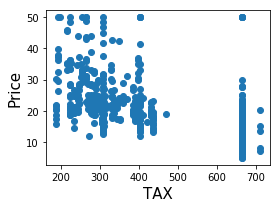

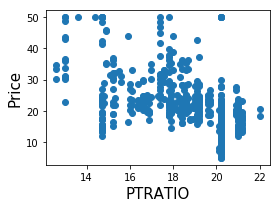

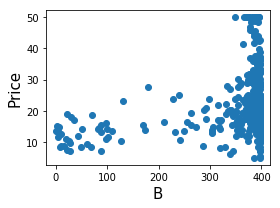

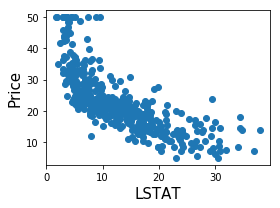

In [64]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

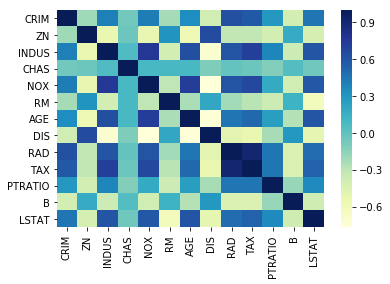

In [118]:
import seaborn as sns
#boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names) #ya esta arriba en otra celda
#acá la correlación la almacena en una variable. Más abajo veremos un ejemplo donde la correlación es directa, sin almacenarse en variable
correlation_matrix = boston_pd.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

In [66]:
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PC1,PC2,CLUSTER
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-2.098297,0.773112,0.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-1.457252,0.591985,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-2.074598,0.599639,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-2.611504,-0.006871,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-2.458185,0.097712,0.0


In [67]:
df_housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PC1,PC2,CLUSTER
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,-0.314968,0.724284,2.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,-0.110513,0.759308,2.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,-0.312360,1.155246,2.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,-0.270519,1.041362,2.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9,-0.125803,0.761978,2.0


In [68]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [69]:
correlation_matrix.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59


In [70]:
df_housing.describe().T
# .T is used to swap the rows and columns (transpose)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524e+00,8.601545,0.006320,0.082045,0.256510,3.677083,88.976200
ZN,506.0,1.136364e+01,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,1.113678e+01,6.860353,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,6.916996e-02,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,5.546951e-01,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284634e+00,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
AGE,506.0,6.857490e+01,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
DIS,506.0,3.795043e+00,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407e+00,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,4.082372e+02,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000


In [104]:
# Easy way to conver boston data to dataframe
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [105]:
#Desplegando un subset de una sola columna pero como una serie
df['ZN']

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6      12.5
7      12.5
8      12.5
9      12.5
10     12.5
11     12.5
12     12.5
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
476     0.0
477     0.0
478     0.0
479     0.0
480     0.0
481     0.0
482     0.0
483     0.0
484     0.0
485     0.0
486     0.0
487     0.0
488     0.0
489     0.0
490     0.0
491     0.0
492     0.0
493     0.0
494     0.0
495     0.0
496     0.0
497     0.0
498     0.0
499     0.0
500     0.0
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64

In [106]:
# Cleaning data: It's most important part of Data Analysis. For data clearing we need to search for any missing data
# after execution we will see that there are no null data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In Machine Learning,the variable that we are more interested about or the variable that we want to predict, given the features , is known as the target variable. Here in this case, we have MEDV as the target variable i.e the median house value in 1000s of dollars.

To know the number of entries in the target variable, run the shape function.

In [77]:
boston['target'].shape

(506,)

In [152]:
# En este momento tenia la duda de cuantos dataframes tenia en memoria y encontre un par de comandos. El segundo me parece más elegante que el primero
%who_ls DataFrame
%whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
boston_pd            DataFrame             CRIM    ZN  INDU<...>\n[506 rows x 13 columns]
correlation_matrix   DataFrame             CRIM    ZN  INDU<...> \nLSTAT   -0.37   1.00  
df                   DataFrame         MEDV      CRIM    ZN<...>\n[506 rows x 14 columns]
df_housing           DataFrame             CRIM    ZN  INDU<...>\n[506 rows x 17 columns]


In [108]:
# The are 506 entries in the target table. Since it is of the same length as the length of the dataframe, we can add it as a feature in the dataframe table. To distinguish the target , we copy it and bring it to the beginning of the dataframe to distinguish it from the rest of the features.
# To ensure that the dataframe looks the way we want, print the head and tail of the dataframe.
df['MEDV'] = boston['target']
y = df.MEDV.copy()
del df['MEDV']
df = pd.concat((y,df),axis=1)
df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [96]:
#There are a total of 13 features or columns. We need to remove all those columns that are of no interest in predicting the target variable. So we remove some columns from the dataframe.
for col in ['ZN','NOX','RAD','PTRATIO','B']:
    del df[col]
df.head()

,MEDV,CRIM,INDUS,CHAS,RM,AGE,DIS,TAX,LSTAT
0,24.0,0.00632,2.31,0.0,6.575,65.2,4.0900,296.0,4.98
1,21.6,0.02731,7.07,0.0,6.421,78.9,4.9671,242.0,9.14
2,34.7,0.02729,7.07,0.0,7.185,61.1,4.9671,242.0,4.03
3,33.4,0.03237,2.18,0.0,6.998,45.8,6.0622,222.0,2.94
4,36.2,0.06905,2.18,0.0,7.147,54.2,6.0622,222.0,5.33


In [110]:
# Desplegando el subset de una columna pero ahora aunque sea una sola, se despliega como una dataframe
df[['ZN']]

,ZN
0,18.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,12.5
7,12.5
8,12.5
9,12.5


In [112]:
#from sklearn.utils import Bunch
cols = ['RM','AGE','TAX','LSTAT','MEDV']
df[cols].head()

,RM,AGE,TAX,LSTAT,MEDV
0,6.575,65.2,296.0,4.98,24.0
1,6.421,78.9,242.0,9.14,21.6
2,7.185,61.1,242.0,4.03,34.7
3,6.998,45.8,222.0,2.94,33.4
4,7.147,54.2,222.0,5.33,36.2


In [113]:
df[cols].corr()

,RM,AGE,TAX,LSTAT,MEDV
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
MEDV,0.695360,-0.376955,-0.468536,-0.737663,1.000000


The above table shows the correlation between each set of value. Large positive scores between the features show that there is a strong positive correlation". We see a maximum of value 1 in all the diagonal values.
Now we visualize the correlation table in the form of a heatmap for better understanding and presentation.

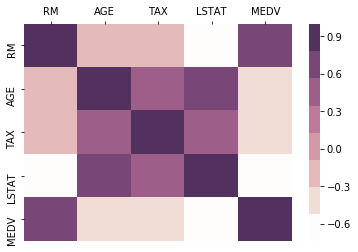

In [146]:
#import requests 
#from bs4 import BeatifulSoup
#import seaborn as sns
ax = sns.heatmap(df[cols].corr(), cmap=sns.cubehelix_palette(8, light=0.99, dark=0.25))
ax.xaxis.tick_top() # move labal to top

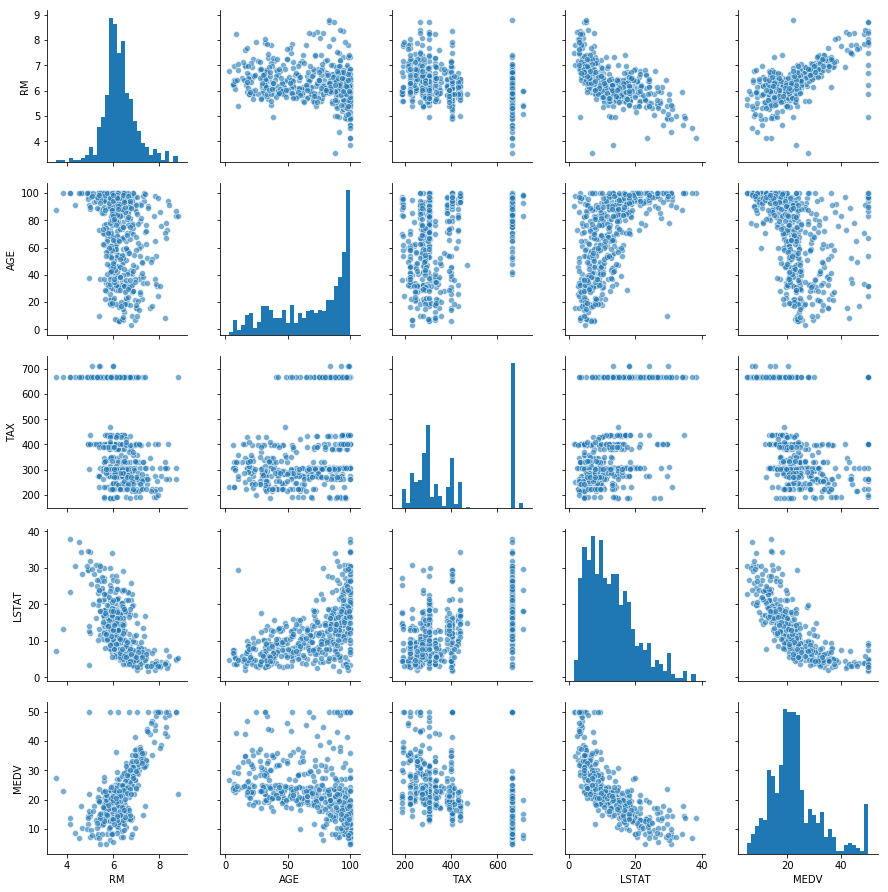

In [148]:
sns.pairplot(df[cols], plot_kws={'alpha': 0.6}, diag_kws={'bins': 30})

# **PREDICTIVE ANALISIS**
In order to predict a value, we first need to create a model and train it. Since this is a regression problem, we will first create a Linear Regression model.
We will use RM and LSTAT as features to compare with our target variable since they are highly correlated.  We will draw scatter plots with linear models by running the following code.

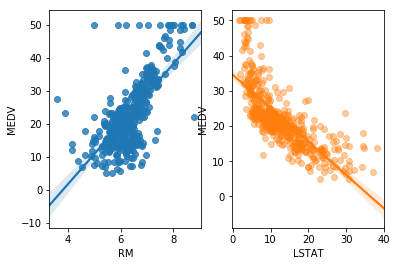

In [151]:
# Regplot y LMplot son dos funciones en seaborn para visualizar relaciones lineales como la regresión. Regplot acepta cualquier tipo de dato como parametro y LMplot tienen que ser tipo string (o sea long form o tidy data)
# The line of best fit is calculated by minimizing the ordinary least squares error function, that Seaborn module does automatically using the regplot function. The shaded area around the line represents 95% confidence intervals.
fig, ax = plt.subplots(1,2)
sns.regplot('RM','MEDV', df, ax=ax[0], scatter_kws={'alpha': 0.4})
sns.regplot('LSTAT','MEDV', df, ax=ax[1], scatter_kws={'alpha': 0.4})

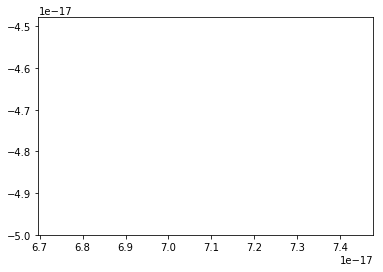

In [153]:
sns.regplot('PC1','PC2', df_housing, ax=ax[0], scatter_kws={'alpha': 0.4})

In [ ]:
%matplotlib inline
def plot_iris(iris, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x = col1, y = col2, 
               data = iris, 
               hue = "Species", 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by color')
    plt.show()
plot_iris(iris, 'Petal_Width', 'Petal_Length')